## ***PROJET MACHINE LEARNING : Implementation d'un model de recommandation de repas***

# ***Phase 1 : Business understanding***

+ CLASSIFICATION 

**🎯BO 1** : Trouver rapidement des recettes personnalisées, adaptées à ses goûts, à son régime alimentaire (ex. végétarien, faible en calories) et à ses habitudes de consommation.

**📊DSO 1:** Mettre en place un système de recommandation intelligent capable de proposer des recettes personnalisées en fonction des préférences des utilisateurs, de leur régime alimentaire et de leurs habitudes de consommation, en s’appuyant sur des approches de filtrage collaboratif et/ou de filtrage par contenu.

**📊Algorithme à appliquer :**
SVM

**📊Pourquoi ?**
Classifier les recettes adaptées à un utilisateur selon son profil (préférences et régime).




**🎯BO 2 :** Identifier les facteurs qui influencent la popularité d’une recette, afin de comprendre pourquoi certaines plaisent davantage et comment les optimiser pour obtenir de meilleures évaluations.

**📊DSO 2 :** Analyser les données de notation et de consommation des recettes afin de mettre en évidence les corrélations et les associations entre les caractéristiques des recettes (ingrédients, temps de préparation, valeurs nutritionnelles, etc.) et leur popularité, en utilisant des techniques comme les règles d’association.

**📊Algorithme à appliquer :**
Règles d’association

**📊Pourquoi ?**
Identifier les patterns d’ingrédients et caractéristiques qui rendent une recette populaire.

**🎯 BO 3** :Anticiper la note qu’une recette pourrait obtenir en fonction de ses caractéristiques (ingrédients, valeurs nutritionnelles, catégorie), afin d’évaluer son potentiel de succès.

**📊 DSO 3** :Développer un modèle de régression capable de prédire la note d’une recette à partir de ses caractéristiques, et identifier les variables les plus influentes grâce à des techniques telles que la régression linéaire.

**📊Algorithme à appliquer :**
Régression linéaire

**📊Pourquoi ?**
Prédiction de notes numériques, simple et interprétable

**🎯BO 4 :**
Proposer des campagnes marketing personnalisées et adaptées à leurs profils et préférences.

**📊 DSO 4 :**
Segmenter les utilisateurs existants (ex. sportifs, gourmets, healthy) en groupes homogènes à l’aide d’algorithmes de clustering tels que K-Means, DBSCAN ou le clustering hiérarchique, afin d’identifier des profils types pour un marketing ciblé.

**📊Algorithme à appliquer :**
K-Means

**📊Pourquoi ?**
Segmenter les utilisateurs en groupes homogènes pour marketing ciblé.

**🎯BO 5 :** Identifier le type de cuisine d’une recette en se basant sur ses ingrédients et regrouper les recettes  selon leurs similarités (nutrition, ingrédients, préférences), afin de faciliter la découverte de nouvelles recettes et améliorer les recommandations personnalisées.

**📊 DSO 5 :**
Utiliser des techniques d’apprentissage non supervisé pour regrouper les recettes  en fonction de leurs caractéristiques et ingrédients, et prédire le type de cuisine d’une recette à partir de sa composition.

**📊Algorithme à appliquer :**
ACP + DBSCAN

**📊Pourquoi ?**
Réduire la dimension des ingrédients (ACP) puis regrouper les recettes similaires (DBSCAN).

# ***Phase 2 : Data understanding***

### **1. Importations necessaires**

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import re
import ast
from sklearn.preprocessing import MultiLabelBinarizer
from collections import Counter
from itertools import chain



### **2. Charger le dataset**

In [ ]:
recipes = pd.read_csv('recipes.csv')
reviews = pd.read_csv('reviews.csv')

La dataset est formée de 2 dataframes : les données sur les recettes se trouvent dans "recipes" et les données des users/profiles dans "reviews".

### a. Explication de colonne par colonne : 

#### i. Recipes : 

| Nom de la colonne              | Signification / Référence               |          Type        |
| ------------------------------ | --------------------------------------- | -------------------- |
| **RecipeId**                   | Identifiant unique de la recette        | `int64`              |
| **Name**                       | Nom de la recette                       | `object` (str)       |
| **AuthorId**                   | Identifiant de l’auteur                 | `int64`              |
| **AuthorName**                 | Nom de l’auteur                         | `object` (str)       |
| **CookTime**                   | Temps de cuisson (ISO 8601)             | `object` (str)       |
| **PrepTime**                   | Temps de préparation (ISO 8601)         | `object` (str)       |
| **TotalTime**                  | Temps total pour préparer et cuire      | `object` (str)       |
| **DatePublished**              | Date de publication de la recette       | `datetime64[ns]`     |
| **Description**                | Description ou résumé de la recette     | `object` (str)       |
| **Images**                     | URL ou chemin de l’image de la recette  | `object` (str)       |
| **RecipeCategory**             | Catégorie de la recette                 | `object` (str)       |
| **Keywords**                   | Mots-clés associés à la recette         | `object` (str)       |
| **RecipeIngredientQuantities** | Quantité des ingrédients                | `object` (str)       |
| **RecipeIngredientParts**      | Nom des ingrédients                     | `object` (str)       |
| **AggregatedRating**           | Note moyenne de la recette              | `float64`            |
| **ReviewCount**                | Nombre d’avis                           | `int64`              |
| **Calories**                   | Valeur énergétique totale               | `float64`            |
| **FatContent**                 | Quantité totale de matières grasses (g) | `float64`            |
| **SaturatedFatContent**        | Quantité de graisses saturées (g)       | `float64`            |
| **CholesterolContent**         | Teneur en cholestérol (mg)              | `float64`            |
| **SodiumContent**              | Teneur en sodium (mg)                   | `float64`            |
| **CarbohydrateContent**        | Quantité de glucides (g)                | `float64`            |
| **FiberContent**               | Quantité de fibres (g)                  | `float64`            |
| **SugarContent**               | Quantité de sucres (g)                  | `float64`            |
| **ProteinContent**             | Quantité de protéines (g)               | `float64`            |
| **RecipeServings**             | Nombre de portions                      | `int64`              |
| **RecipeYield**                | Rendement ou quantité finale obtenue    | `object` (str)       |
| **RecipeInstructions**         | Étapes de préparation de la recette     | `object` (str)       |


#### ii. Reviews : 

| Nom de la colonne | Signification / Référence                   |         Type         |
| ----------------- | ------------------------------------------- | -------------------- |
| **ReviewId**      | Identifiant unique de l’avis                | `int64`              |
| **RecipeId**      | Identifiant de la recette associée à l’avis | `int64`              |
| **AuthorId**      | Identifiant de l’auteur de l’avis           | `int64`              |
| **AuthorName**    | Nom de l’auteur de l’avis                   | `object` (str)       |
| **Rating**        | Note donnée à la recette                    | `int64`              |
| **Review**        | Texte de l’avis / commentaire               | `object` (str)       |
| **DateSubmitted** | Date à laquelle l’avis a été soumis         | `datetime64[ns]`     |
| **DateModified**  | Date de dernière modification de l’avis     | `datetime64[ns]`     |


#### ii. Suppression de colonnes sémantiquement pas nécessaires : 

In [3]:
df_reviews = reviews.drop(
    ['AuthorId', 'AuthorName', 'DateSubmitted', 'DateModified'], 
    axis=1, 
    errors='ignore'
)

df_recipes = recipes.drop(
    ['Images', 'AuthorName', 'DatePublished', 'AuthorId'], 
    axis=1, 
    errors='ignore'
)

print("Colonnes restantes dans les recipes : \n")
print(df_recipes.columns.tolist())
print(" \n")
print("Colonnes restantes dans les reviews : \n")
print(df_reviews.columns.tolist())

Colonnes restantes dans les recipes : 

['RecipeId', 'Name', 'CookTime', 'PrepTime', 'TotalTime', 'Description', 'RecipeCategory', 'Keywords', 'RecipeIngredientQuantities', 'RecipeIngredientParts', 'AggregatedRating', 'ReviewCount', 'Calories', 'FatContent', 'SaturatedFatContent', 'CholesterolContent', 'SodiumContent', 'CarbohydrateContent', 'FiberContent', 'SugarContent', 'ProteinContent', 'RecipeServings', 'RecipeYield', 'RecipeInstructions']
 

Colonnes restantes dans les reviews : 

['ReviewId', 'RecipeId', 'Rating', 'Review']


### b. Les dimensions du dataset

In [4]:
print("Taille des recipes : ")
print(df_recipes.shape)
print("\nTaille des reviews : ")
print(df_reviews.shape)

Taille des recipes : 
(522517, 24)

Taille des reviews : 
(1401982, 4)


##### On remarque que la dataset est très géante, donc on va procéder à la diminution de nombre de lignes :

In [5]:
# 1️⃣ Réduction aléatoire de recipes
df_recipes_small = df_recipes.sample(frac=0.0025, random_state=42)

# 2️⃣ Récupérer les RecipeId sélectionnés
selected_ids = df_recipes_small['RecipeId'].tolist()

# 3️⃣ Filtrer les reviews correspondantes
df_reviews_small = df_reviews[df_reviews['RecipeId'].isin(selected_ids)]


##### Les nouveaux dimensions :

In [6]:
print("Taille des recipes : ")
print(df_recipes_small.shape)
print("\nTaille des reviews : ")
print(df_reviews_small.shape)

Taille des recipes : 
(1306, 24)

Taille des reviews : 
(3231, 4)


### c. Le % des  valeurs nulles du dataset par colonne :

In [7]:
null_percent_recipes = df_recipes_small.isnull().mean() * 100
print("Pourcentage de valeurs nulles par colonne (recipes) :")
print(null_percent_recipes)
null_percent_reviews = df_reviews_small.isnull().mean() * 100
print("\nPourcentage de valeurs nulles par colonne (reviews) :")
print(null_percent_reviews)


Pourcentage de valeurs nulles par colonne (recipes) :
RecipeId                       0.000000
Name                           0.000000
CookTime                      15.007657
PrepTime                       0.000000
TotalTime                      0.000000
Description                    0.000000
RecipeCategory                 0.000000
Keywords                       2.603369
RecipeIngredientQuantities     0.000000
RecipeIngredientParts          0.000000
AggregatedRating              50.000000
ReviewCount                   48.009188
Calories                       0.000000
FatContent                     0.000000
SaturatedFatContent            0.000000
CholesterolContent             0.000000
SodiumContent                  0.000000
CarbohydrateContent            0.000000
FiberContent                   0.000000
SugarContent                   0.000000
ProteinContent                 0.000000
RecipeServings                33.460949
RecipeYield                   66.385911
RecipeInstructions        

#### on remarque que 70% des records de RecipeYield sont nuls et meme les valeurs non nuls ne sont pas significatives. C'est pour ca qu'on a décider de la supprimer : 

In [8]:
df_recipes_small = df_recipes_small.drop(
    ['RecipeYield'], 
    axis=1, 
    errors='ignore'
)
print("Colonnes de recipes restantes apres suppression : \n")
print(df_recipes_small.columns.tolist())


Colonnes de recipes restantes apres suppression : 

['RecipeId', 'Name', 'CookTime', 'PrepTime', 'TotalTime', 'Description', 'RecipeCategory', 'Keywords', 'RecipeIngredientQuantities', 'RecipeIngredientParts', 'AggregatedRating', 'ReviewCount', 'Calories', 'FatContent', 'SaturatedFatContent', 'CholesterolContent', 'SodiumContent', 'CarbohydrateContent', 'FiberContent', 'SugarContent', 'ProteinContent', 'RecipeServings', 'RecipeInstructions']


 ### d. Description sur les colonnes

In [9]:
print(df_recipes_small.describe())
print(df_reviews_small.describe())

            RecipeId  AggregatedRating  ReviewCount     Calories   FatContent  \
count    1306.000000        653.000000   679.000000  1306.000000  1306.000000   
mean   280489.841501          4.674579     4.895434   438.917305    22.739969   
std    158188.598986          0.591476    11.148606   556.876004    36.303039   
min        93.000000          1.000000     1.000000     0.000000     0.000000   
25%    147666.750000          4.500000     1.000000   161.075000     5.600000   
50%    279871.500000          5.000000     2.000000   306.300000    13.400000   
75%    421463.250000          5.000000     4.000000   497.125000    26.175000   
max    540512.000000          5.000000   157.000000  6553.300000   496.600000   

       SaturatedFatContent  CholesterolContent  SodiumContent  \
count          1306.000000         1306.000000    1306.000000   
mean              8.986753           86.191960     657.141577   
std              17.142788          206.639465    1555.217024   
min       

 ### **e. Distribution de données : ( histogrammes / boxplots )** 

 #### **i.recipes :** 

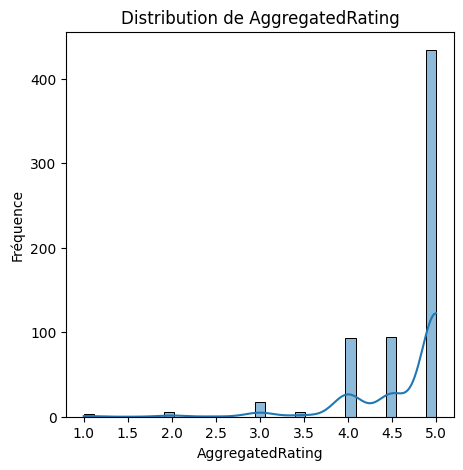

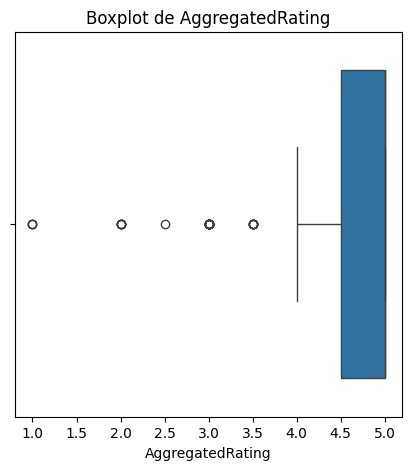

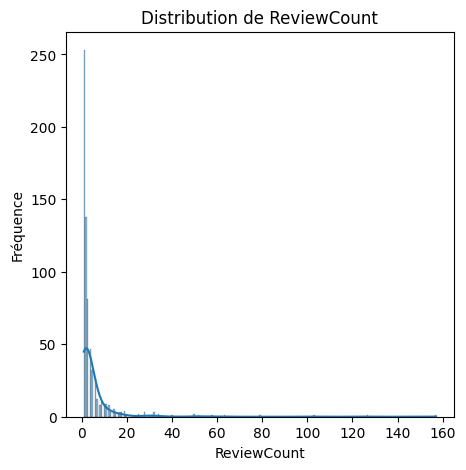

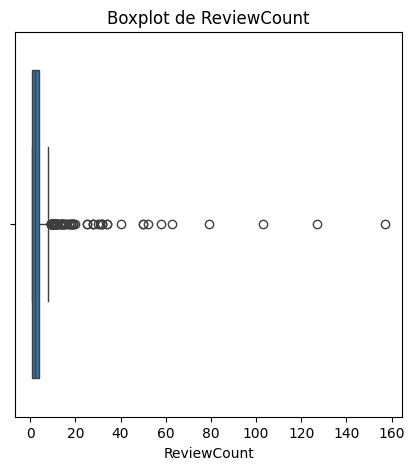

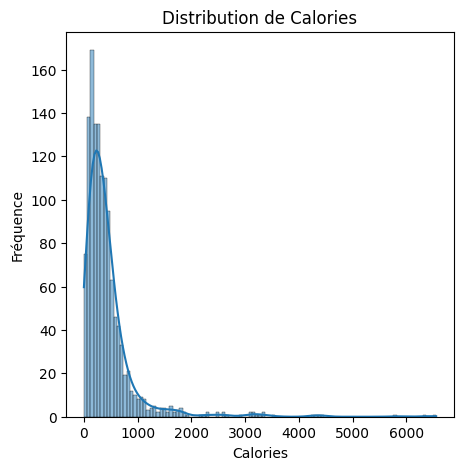

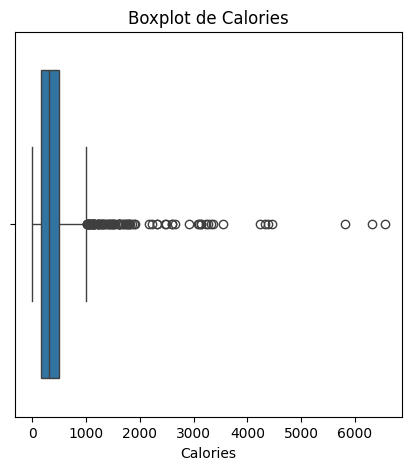

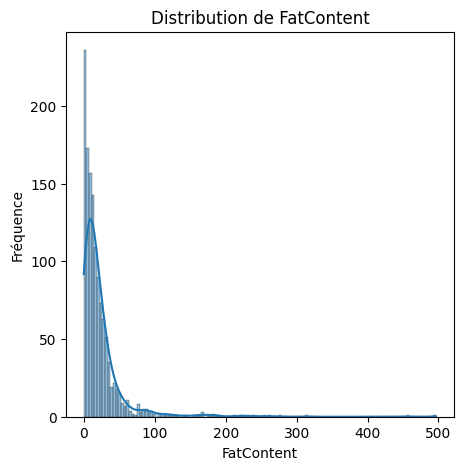

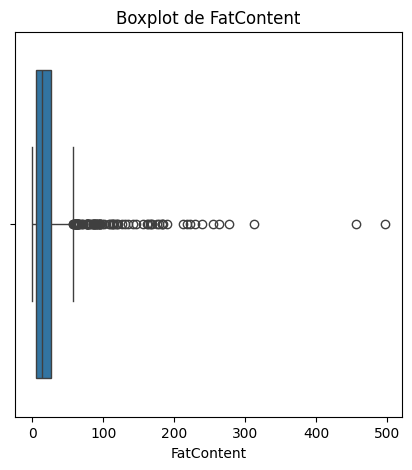

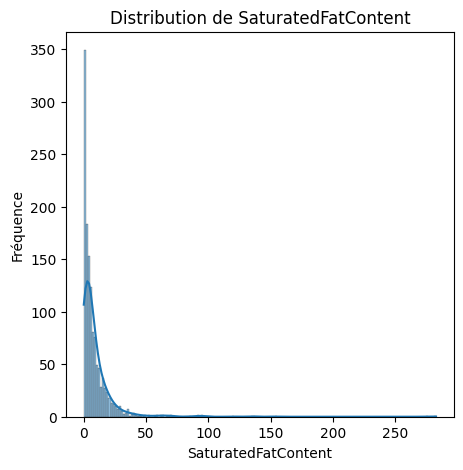

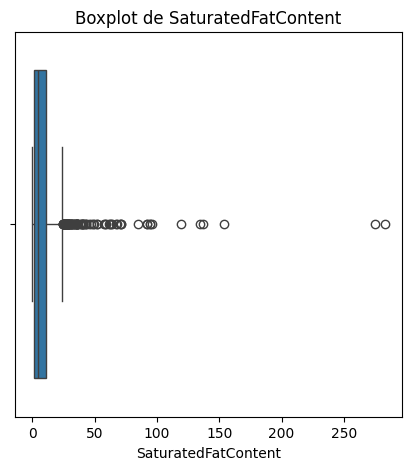

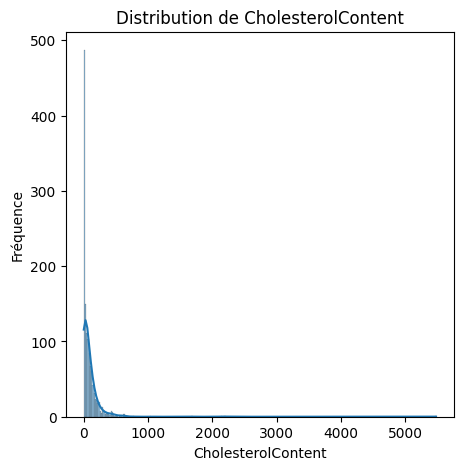

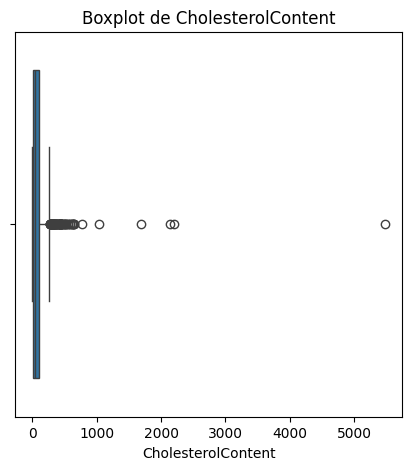

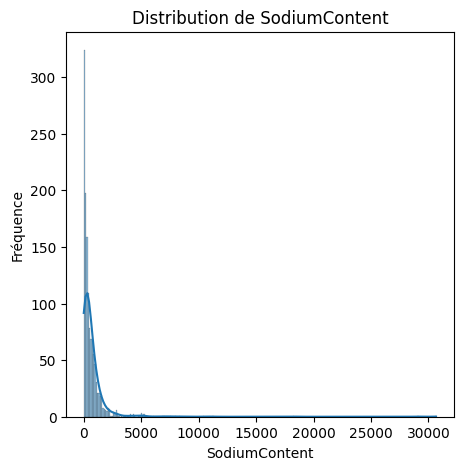

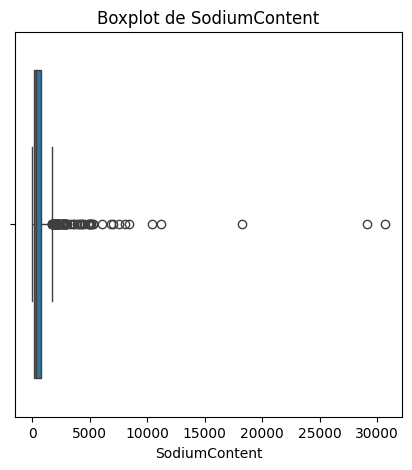

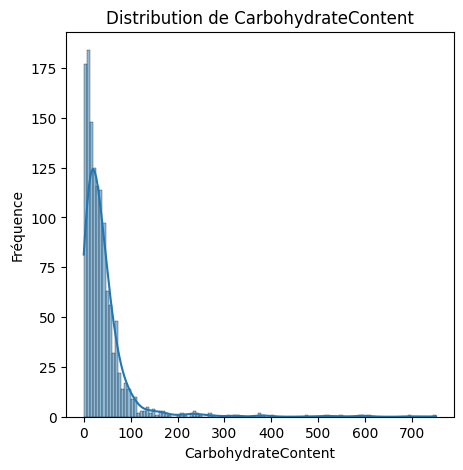

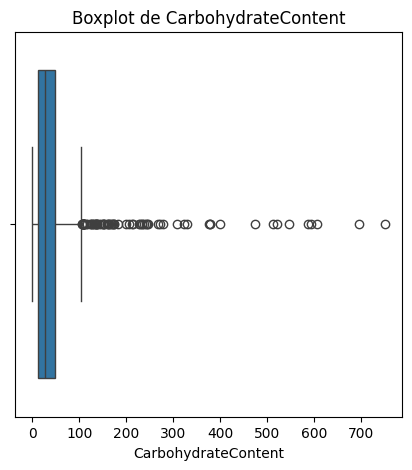

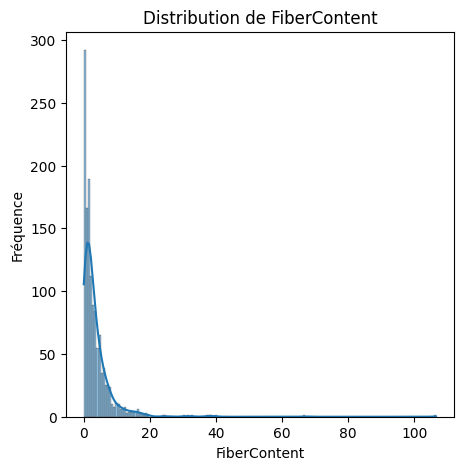

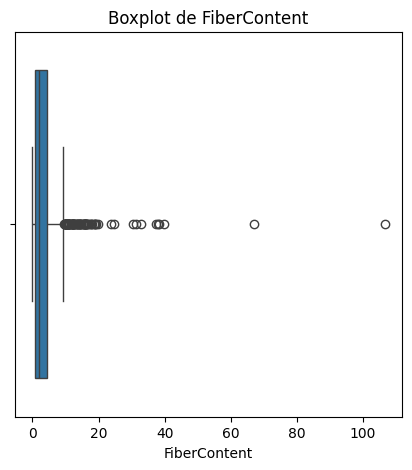

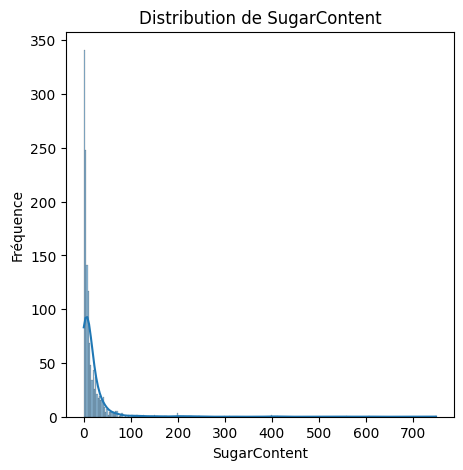

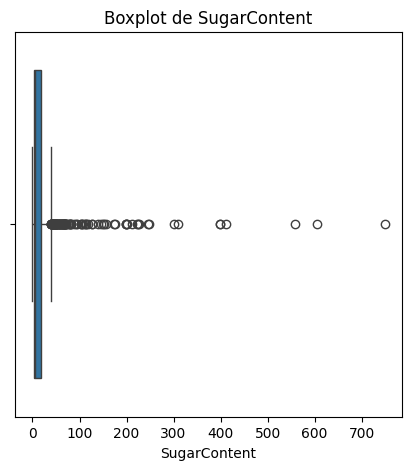

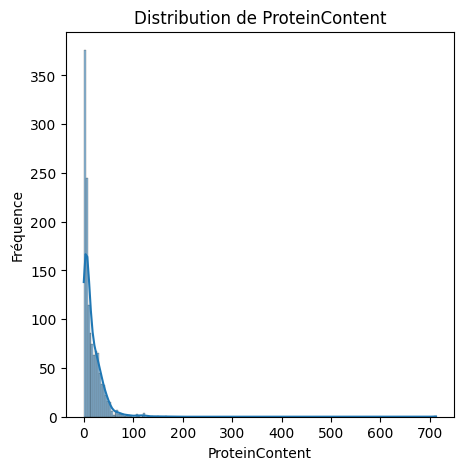

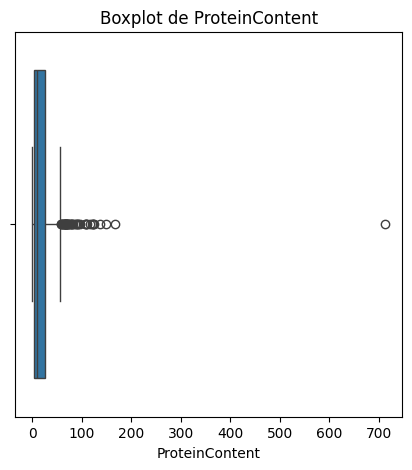

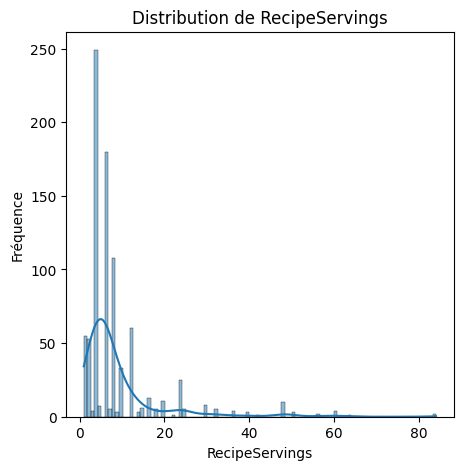

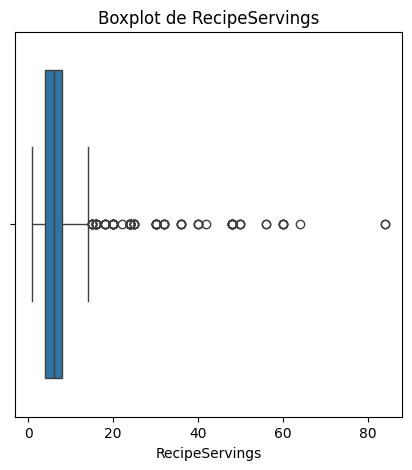

In [10]:
numeric_cols = [
    "AggregatedRating", "ReviewCount", "Calories", "FatContent",
    "SaturatedFatContent", "CholesterolContent", "SodiumContent",
    "CarbohydrateContent", "FiberContent", "SugarContent", "ProteinContent",
    "RecipeServings"
]
for col in numeric_cols:
    plt.figure(figsize=(5,5))
    sns.histplot(df_recipes_small[col], kde=True)
    plt.title(f"Distribution de {col}")
    plt.xlabel(col)
    plt.ylabel("Fréquence")
    plt.show()
    plt.figure(figsize=(5,5))
    sns.boxplot(x=df_recipes_small[col])
    plt.title(f"Boxplot de {col}")
    plt.show()

 #### **ii.reviews :** 

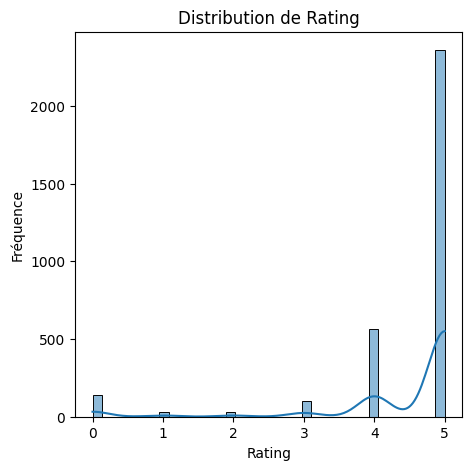

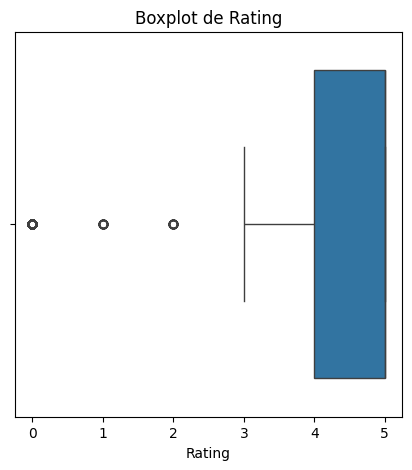

In [14]:
plt.figure(figsize=(5,5))
sns.histplot(df_reviews_small["Rating"], kde=True)
plt.title(f"Distribution de Rating")
plt.xlabel("Rating")
plt.ylabel("Fréquence")
plt.show()
plt.figure(figsize=(5,5))
sns.boxplot(x=df_reviews_small["Rating"])
plt.title(f"Boxplot de Rating")
plt.show()

 ## Interpretation de la description et de la distrubtion ( Quelques informations a retenir sur les données ) :

#### - Recipes

* Notes globalement élevées : moyenne ≈ 4,67/5.

* Popularité très inégale : ReviewCount de 1 à 157 avis.

* Nutrition variable avec des valeurs extrêmes : calories 0–6553 kcal, protéines 0–712 g, matières grasses 0–496 g.

* Portions : 1–84, médiane 6.



#### - Reviews

* Notes majoritairement élevées : moyenne ≈ 4,41/5.

* Variabilité faible : la majorité des avis sont 4 ou 5.

* Certaines recettes ont peu d’avis, ce qui peut influencer la fiabilité de la note moyenne.

→ Points clés : valeurs extrêmes à contrôler, popularité et nombre d’avis très variables.

# ***Phase 3 : Data preparation***

 ### Formater les données pour une meilleur utilisation ML :

 #### a/ Nom de la recette :

In [15]:
def clean_name(name):
    if pd.isna(name):
        return None
    name = name.lower()
    name = re.sub(r"[^a-z\s]", "", name)
    name = re.sub(r"\s+", " ", name)
    name = name.strip()
    return name
df_recipes_small['Name'] = df_recipes_small['Name'].apply(clean_name)


 #### b/ Prep-time / Cook-time / Total-time de la recette :

In [16]:
import re
import pandas as pd

def convert_to_minutes(time_str):
    if pd.isna(time_str):
        return None
    time_str = str(time_str).lower().strip()
    if time_str.startswith('pt'):
        hours = re.search(r'(\d+)h', time_str)
        minutes = re.search(r'(\d+)m', time_str)
        total_minutes = 0
        if hours:
            total_minutes += int(hours.group(1)) * 60
        if minutes:
            total_minutes += int(minutes.group(1))
        return total_minutes if total_minutes > 0 else None
    hours = re.search(r'(\d+)\s*h', time_str)
    minutes = re.search(r'(\d+)\s*m', time_str)
    total_minutes = 0
    if hours:
        total_minutes += int(hours.group(1)) * 60
    if minutes:
        total_minutes += int(minutes.group(1))
    if total_minutes == 0 and time_str.isdigit():
        return int(time_str)
    return total_minutes if total_minutes > 0 else None


for col in ['CookTime', 'PrepTime', 'TotalTime']:
    df_recipes_small[col] = df_recipes_small[col].apply(convert_to_minutes)


 #### c/ FatContent / SaturatedFatContent / CholesterolContent / SodiumContent / CarbohydrateContent / FiberContent / SugarContent / ProteinContent : 
 (Les valeurs manquantes sont remplacées par la moyenne et on a utilisé le StandardScaler pour la standarisation de leurs valeurs)

In [17]:
nutrition_cols = [
    'FatContent', 'SaturatedFatContent', 'CholesterolContent', 
    'SodiumContent', 'CarbohydrateContent', 'FiberContent', 
    'SugarContent', 'ProteinContent', 'Calories'
]
for col in nutrition_cols:
    mean_val = df_recipes_small[col].mean()
    df_recipes_small[col] = df_recipes_small[col].fillna(mean_val)
scaler = MinMaxScaler()

* Justification de choix : 

    Pourquoi MinMaxScaler ? 
    - met toutes les colonnes numériques sur une échelle commune [0,1], ce qui conserve les proportions relatives des nutriments et évite que les variables avec de grandes valeurs (ex : Sodium, Calories) dominent les algorithmes ML.

    Pourquoi Imputation par la moyenne ? 
    - remplace les valeurs manquantes par la moyenne de la colonne pour conserver la distribution globale et éviter de biaiser les données, tout en gardant la cohérence des     quantités nutritionnelles.

 #### d/ Description :

In [18]:
def clean_text(text):
    if pd.isna(text):
        return ""
    text = text.lower()
    text = re.sub(r"[^a-z0-9\s]", "", text)
    text = re.sub(r"\s+", " ", text)
    text = text.strip()
    return text
df_recipes_small['Description'] = df_recipes_small['Description'].apply(clean_text)

 #### d/ RecipeInstructions :

In [19]:
def clean_instructions(instr):
    if pd.isna(instr):
        return ""
    
    instr = str(instr)
    steps = re.findall(r'"(.*?)"', instr)
    text = " ".join(steps) if steps else instr
    text = text.lower()                       
    text = re.sub(r"[^a-z0-9\s]", "", text)  
    text = re.sub(r"\s+", " ", text)         
    text = text.strip()                       
    return text
df_recipes_small['RecipeInstructions'] = df_recipes_small['RecipeInstructions'].apply(clean_instructions)


 #### e/ RecipeCategory :

Nombre de Categories uniques :

In [20]:

print("Nombre de catégories uniques :", df_recipes_small['RecipeCategory'].nunique())

Nombre de catégories uniques : 138


Remarque : 
- Le nombre de categories uniques est trés élevé (138) ce qui empeche de procéder directement a un encodage car ca risque de creer beaucoup de colonnes qui sont nulles et inutiles.
On va donc essayer de faire un traitement spécifique :

ETAPE 1 : Ces catégories sont trés spécifiques, donc on va les mettre tout a 'None' puis ensuite les remplacer par une categorie qu'on va créer qui est 'Other'

In [21]:

non_food_tags = [
    'bath/beauty', '< 15 mins', '< 30 mins', '< 60 mins', '< 4 hours',
    'easy', 'beginner cook', 'kid friendly', 'inexpensive', 'from scratch',
    'high protein', 'low protein', 'low cholesterol', 'very low carbs',
    'high in...'
]
df_recipes_small['RecipeCategory'] = df_recipes_small['RecipeCategory'].str.lower()
df_recipes_small['RecipeCategory'] = df_recipes_small['RecipeCategory'].apply(
    lambda x: None if x in non_food_tags else x
)


ETAPE 2 : Regroupement des catégories rares (Si une catégorie a moins de 5 recettes, on la remplace par 'other' pour réduire la dimensionnalité avant encodage)

In [22]:
category_counts = df_recipes_small['RecipeCategory'].value_counts()
rare_categories = category_counts[category_counts < 5].index.tolist()
df_recipes_small['RecipeCategory'] = df_recipes_small['RecipeCategory'].apply(
    lambda x: 'other' if x in rare_categories else x
)

ETAPE 3 : Gestion des valeurs manquantes (Les valeurs manquantes (None) ou supprimées à l’étape 1 → remplacer par 'other')

In [23]:
df_recipes_small['RecipeCategory'] = df_recipes_small['RecipeCategory'].fillna('other')

ETAPE 4 : OneHot Encodage

In [24]:
df_recipes_small = pd.get_dummies(
    df_recipes_small, 
    columns=['RecipeCategory'], 
    prefix='Category'            
)

Justification de choix : 


On a utilisé OneHotEncoder parce que :

 * Les catégories n’ont aucun ordre implicite, donc un encodage numérique simple (LabelEncoder) pourrait induire une relation fictive.

 * OneHot transforme chaque catégorie en colonne binaire, ce qui est idéal pour les algos ML sensibles à l’ordre (régression, NN, SVM).

 #### e/ RecipeIngredientParts et RecipeIngredientQuantities :

ETAPE 1 : nettoyage

In [25]:
import re
import pandas as pd

def parse_ingredients(parts_str, quantities_str):
    if pd.isna(parts_str) or pd.isna(quantities_str):
        return [], []
    
    parts_str = str(parts_str)
    quantities_str = str(quantities_str)
    
    parts = re.findall(r'"(.*?)"', parts_str)
    quantities = re.findall(r'"(.*?)"', quantities_str)
    
    if not parts:
        parts = [p.strip() for p in parts_str.split(',') if p.strip()]
    if not quantities:
        quantities = [q.strip() for q in quantities_str.split(',') if q.strip()]
    
    if len(quantities) != len(parts):
        quantities = [1]*len(parts)
    
    quantities_float = []
    for q in quantities:
        try:
            quantities_float.append(float(q))
        except (ValueError, TypeError):
            m = re.findall(r'[\d.]+', str(q))
            quantities_float.append(float(m[0]) if m else 1)
    
    return parts, quantities_float


ETAPE 2 : encodage avec Multi-hot encoding

In [28]:
df_recipes_small['IngredientList'], df_recipes_small['IngredientQtyList'] = zip(*df_recipes_small.apply(
    lambda row: parse_ingredients(row['RecipeIngredientParts'], row['RecipeIngredientQuantities']),
    axis=1
))
all_ingredients = sorted(set(chain.from_iterable(df_recipes_small['IngredientList'])))
print(f"Nombre total d'ingrédients uniques : {len(all_ingredients)}")
ingredient_matrix = np.zeros((len(df_recipes_small), len(all_ingredients)))
for i, (parts, qtys) in enumerate(zip(df_recipes_small['IngredientList'], df_recipes_small['IngredientQtyList'])):
    for part, qty in zip(parts, qtys):
        idx = all_ingredients.index(part)
        ingredient_matrix[i, idx] = qty
df_ingredients_encoded = pd.DataFrame(ingredient_matrix, columns=all_ingredients)
scaler = MinMaxScaler()
df_ingredients_encoded_scaled = pd.DataFrame(scaler.fit_transform(df_ingredients_encoded), columns=all_ingredients)
df_ingredients_encoded_scaled.head()
df_recipes_small_reset = df_recipes_small.reset_index(drop=True)
df_ingredients_encoded_scaled_reset = df_ingredients_encoded_scaled.reset_index(drop=True)
df_recipes_small_final = pd.concat([df_recipes_small_reset, df_ingredients_encoded_scaled_reset], axis=1)
cols_to_drop = ['RecipeIngredientParts', 'RecipeIngredientQuantities', 'IngredientList', 'IngredientQtyList']
df_recipes_small_final.drop(columns=cols_to_drop, inplace=True)


Nombre total d'ingrédients uniques : 1424


 #### f/ AggregatedRating :

In [29]:
mean_rating = df_recipes_small_final['AggregatedRating'].mean()
df_recipes_small_final['AggregatedRating'] = df_recipes_small_final['AggregatedRating'].fillna(mean_rating)
scaler = MinMaxScaler()
df_recipes_small_final['AggregatedRating'] = scaler.fit_transform(
    df_recipes_small_final[['AggregatedRating']]
)

 #### g/ Keywords :

ETAPE 1 : Nettoyage

In [30]:
def clean_keywords(kw_str):
    if pd.isna(kw_str) or not isinstance(kw_str, str):
        return []
    kw_str = kw_str.replace('c(', '').replace(')', '').replace('"', '')
    keywords = [k.strip() for k in kw_str.split(',') if k.strip()]
    keywords = [k for k in keywords if not re.search(r'\b(mins?|hours?)\b', k, re.IGNORECASE)]
    keywords = [re.sub(r'\.{2,}', '', k).strip() for k in keywords]
    keywords = [k for k in keywords if k]
    return keywords
df_recipes_small_final['CleanedKeywords'] = df_recipes_small_final['Keywords'].apply(clean_keywords)
df_recipes_small_final.drop(columns=['Keywords'], inplace=True)

ETAPE 2 : Encodage

In [31]:

mlb = MultiLabelBinarizer()
keywords_encoded = mlb.fit_transform(df_recipes_small_final['CleanedKeywords'])
df_keywords_encoded = pd.DataFrame(
    keywords_encoded,
    columns=mlb.classes_,
    index=df_recipes_small_final.index
)
df_recipes_small_final = pd.concat([df_recipes_small_final, df_keywords_encoded], axis=1)
df_recipes_small_final.drop(columns=['CleanedKeywords'], inplace=True, errors='ignore')

 #### h/ rating de Reviews :

In [32]:
df_reviews_small = df_reviews_small.copy()
mean_rating = df_reviews_small['Rating'].mean()
df_reviews_small['Rating'] = df_reviews_small['Rating'].fillna(mean_rating)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_reviews_small['Rating_scaled'] = scaler.fit_transform(df_reviews_small[['Rating']])
df_reviews_small['Rating'] = df_reviews_small['Rating_scaled']
df_reviews_small.drop(columns=['Rating_scaled'], inplace=True)

# FUSIONNER LES 2 DATAFRAMES REVIEWS ET RECIPES SUR LA CLE ETRANGERE RecipeId :

In [ ]:
df_finale = pd.merge(
    df_recipes_small,
    df_recipes_small_final,     
    on='RecipeId',        
    how='inner'          
)

,RecipeId,Name_x,CookTime_x,PrepTime_x,TotalTime_x,Description_x,Keywords,RecipeIngredientQuantities,RecipeIngredientParts,AggregatedRating_x,...,Venezuelan,Very Low Carbs,Vietnamese,Weeknight,Welsh,White Rice,Whole Chicken,Wild Game,Winter,Yam/Sweet Potato
0,373686,picnic cowboy caviar,60.0,20.0,80.0,make and share this picnic cowboy caviar recip...,"c(""Beans"", ""Tex Mex"", ""Southwestern U.S."", ""Po...","c(""15"", ""15"", ""15"", ""5 -6"", ""1"", ""1"", ""2"", ""2""...","c(""black beans"", ""black-eyed peas"", ""white cor...",4.0,...,0,0,0,0,0,0,0,0,0,0
1,406657,turkey schnitzel with tots amp applecranberry ...,25.0,15.0,40.0,make and share this turkey schnitzel with tots...,"c(""Meat"", ""< 60 Mins"")","c(""4"", ""4"", ""1"", ""1/3"", NA, ""2"", ""1 1/2"", ""1"",...","c(""potatoes"", ""mcintosh apples"", ""apple cider""...",NaN,...,0,0,0,0,0,0,0,0,0,0
2,457811,banilla splash,NaN,3.0,3.0,make and share this banilla splash recipe from...,"c(""Polynesian"", ""< 15 Mins"", ""Easy"")","c(""1"", ""1"", ""4 1/2"", ""1 1/2"")","c(""vodka"", ""cranberry juice"")",5.0,...,0,0,0,0,0,0,0,0,0,0
3,112556,easy tomato tortilla soup,10.0,5.0,15.0,i am looking forward to trying this super simp...,"c(""< 15 Mins"", ""Easy"")","c(""2"", ""1"", ""1/2"", NA, NA, ""1"", ""1"", ""2"", ""2"")","c(""diced tomatoes with green chilies"", ""navy b...",3.0,...,0,0,0,0,0,0,0,0,0,0
4,93,blue stuffed mushrooms,NaN,15.0,15.0,make and share this blue stuffed mushrooms rec...,"c(""< 15 Mins"", ""Easy"")","c(""4"", ""4"", ""1"", ""14"", ""14"", ""14"")","c(""blue cheese"", ""cream cheese"", ""half-and-hal...",5.0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
total_ids = df_finale['RecipeId'].shape[0]
unique_ids = df_finale['RecipeId'].nunique()

print(f"Total RecipeIds (rows): {total_ids}")
print(f"Unique RecipeIds: {unique_ids}")
print(f"Number of duplicates: {total_ids - unique_ids}")


Total RecipeIds (rows): 1306
Unique RecipeIds: 1306
Number of duplicates: 0


# TABLEAU COMPARATIF : LA STRUCTURE DE DONNEES AVANT ET APRES PREPARATION

| Colonne                                                                                                                                             | Valeurs originales                                               | Valeurs après traitement                                           | Type de transformation            | Objectif pour ML                                         |
| --------------------------------------------------------------------------------------------------------------------------------------------------- | ---------------------------------------------------------------- | ------------------------------------------------------------------ | --------------------------------- | -------------------------------------------------------- |
| `Name`                                                                                                                                              | Texte libre, majuscules/minuscules, espaces, caractères spéciaux | Minuscules, sans ponctuation ni espaces superflus                  | Nettoyage texte                   | Standardiser pour NLP / features textuelles              |
| `CookTime`, `PrepTime`, `TotalTime`                                                                                                                 | Strings type `"PT1H20M"`, `"45M"`, `"2H"`                        | Nombres entiers → minutes (ex: 80, 45, 120)                        | Parsing / Feature engineering     | Variables numériques continues exploitables              |
| `FatContent`, `SaturatedFatContent`, `CholesterolContent`, `SodiumContent`, `CarbohydrateContent`, `FiberContent`, `SugarContent`, `ProteinContent` | Strings avec unités (`"10g"`, `"5 mg"`), NaN possibles           | Float normalisé entre 0 et 1                                       | Imputation moyenne + MinMaxScaler | Uniformiser échelle pour ML                              |
| `Description`                                                                                                                                       | Texte long, ponctuation, majuscules/minuscules                   | Texte nettoyé, minuscules, ponctuation supprimée                   | Nettoyage texte                   | Préparation pour NLP ou features textuelles              |
| `RecipeCategory`                                                                                                                                    | Strings multiples, ponctuation, références temps                 | OneHotEncoding (colonnes binaires par catégorie)                   | Encodage catégoriel               | Transformer catégories textuelles en features numériques |
| `Keywords` → `CleanedKeywords`                                                                                                                      | Strings multiples, ponctuation, `< 60 Mins`                      | Listes propres, sans ponctuation ni temps → OneHotEncoding         | Nettoyage + encodage multi-label  | Transformer mots-clés en features binaires exploitables  |
| `RecipeIngredientParts` & `RecipeIngredientQuantities`                                                                                              | Strings avec guillemets, nombres, NaN                            | Listes Python de strings et floats → OneHotEncoding + MinMaxScaler | Parsing + feature engineering     | Représentation numérique des ingrédients et quantités    |
| `AggregatedRating`                                                                                                                                  | Float avec NaN, valeurs répétitives (0 à 1)                      | Float normalisé entre 0 et 1, NaN remplacés par moyenne            | Imputation + scaling              | Normalisation des notes pour ML                          |
| `Review`                                                                                                                                            | Texte libre, majuscules/minuscules, ponctuation                  | Texte nettoyé, minuscules, ponctuation supprimée                   | Nettoyage texte                   | Préparation NLP ou features textuelles                   |
| `Rating`                                                                                                                                            | Entiers 1–5, NaN possibles                                       | `Rating_scaled` float entre 0 et 1, original supprimé              | Imputation + MinMaxScaler         | Valeur normalisée pour ML                                |
| `RecipeId`                                                                                                                                          | Identifiant unique recette                                       | Inchangé                                                           | Clé étrangère                     | Permet la fusion avec `reviews` et association 1:1       |
